##Project 5

**Changes:**
- Activation after Batch Normalization
- L2 Regularization
- Image Normalization

**Result**:
- Parameters: 14,708
- Epochs Run: 40
- Best Epoch: 35
- Training Accuracy: 98.92
- Validation Accuracy: 99.42


In [1]:
# Install and Import Keras
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Importing the required libraries
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization, Activation
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
# Load MNIST into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
# Connecting Drive to save models
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(60000, 28, 28)


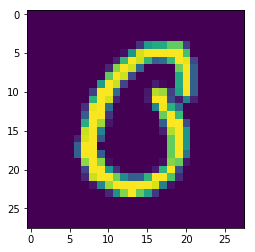

In [6]:
# Looking at sample images
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[234])

In [0]:
# Defining shape of the sets
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [9]:
# Inspecting labels
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
# Inspectingt the categorized labels
Y_train[20:30]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [12]:
# Building the infrastructure
model = Sequential()
 
model.add(Convolution2D(8, 3, kernel_regularizer=regularizers.l2(0.01), input_shape=(28,28,1), name = "C3-1")) #26
model.add(BatchNormalization(name = "BN-C3-1"))
model.add(Activation('relu', name = 'Relu-C3-1'))
model.add(Dropout(0.1, name = "DO-C3-1"))

model.add(Convolution2D(16, 3, kernel_regularizer=regularizers.l2(0.01), name = "C3-2")) #24
model.add(BatchNormalization(name = "BN-C3-2"))
model.add(Activation('relu', name = 'Relu-C3-2'))
model.add(Dropout(0.1, name = "DO-C3-2"))

model.add(Convolution2D(16, 3, kernel_regularizer=regularizers.l2(0.01), name = "C3-3")) #22
model.add(BatchNormalization(name = "BN-C3-3"))
model.add(Activation('relu', name = 'Relu-C3-3'))
model.add(Dropout(0.1, name = "DO-C3-3"))

model.add(MaxPooling2D(2, name = "MP1")) #11

model.add(Convolution2D(8, 1, kernel_regularizer=regularizers.l2(0.01), name = "C1-1")) #11
model.add(BatchNormalization(name = "BN-C1-1"))
model.add(Activation('relu', name = 'Relu-C1-1'))
model.add(Dropout(0.1, name = "DO-C1-1"))

model.add(Convolution2D(16, 3, kernel_regularizer=regularizers.l2(0.01), name = "C3-4")) #9
model.add(BatchNormalization(name = "BN-C3-4"))
model.add(Activation('relu', name = 'Relu-C3-4'))
model.add(Dropout(0.1, name = "DO-C3-4"))

model.add(Convolution2D(10, 1, kernel_regularizer=regularizers.l2(0.01), name = "C1-2")) #9
model.add(BatchNormalization(name = "BN-C1-2"))
model.add(Activation('relu', name = 'Relu-C1-2'))
model.add(Dropout(0.1, name = "DO-1-2"))

model.add(Convolution2D(16, 3, kernel_regularizer=regularizers.l2(0.01), name = "C3-5")) #7
model.add(BatchNormalization(name = "BN-C3-5"))
model.add(Activation('relu', name = 'Relu-C3-5'))
model.add(Dropout(0.1, name = "DO-C3-5"))

model.add(Convolution2D(10, 7, kernel_regularizer=regularizers.l2(0.01), name = "C7-1")) #1

model.add(Flatten(name = "F"))
model.add(Activation('softmax'))

# Checking the model
model.summary()

W0617 14:54:42.495935 139857337501568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0617 14:54:42.526457 139857337501568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 14:54:42.530355 139857337501568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 14:54:42.603497 139857337501568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0617 14:54:42.606387 1398573375

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C3-1 (Conv2D)                (None, 26, 26, 8)         80        
_________________________________________________________________
BN-C3-1 (BatchNormalization) (None, 26, 26, 8)         32        
_________________________________________________________________
Relu-C3-1 (Activation)       (None, 26, 26, 8)         0         
_________________________________________________________________
DO-C3-1 (Dropout)            (None, 26, 26, 8)         0         
_________________________________________________________________
C3-2 (Conv2D)                (None, 24, 24, 16)        1168      
_________________________________________________________________
BN-C3-2 (BatchNormalization) (None, 24, 24, 16)        64        
_________________________________________________________________
Relu-C3-2 (Activation)       (None, 24, 24, 16)        0         
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

In [14]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

W0617 14:54:46.179069 139857337501568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
#lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
#early_stopper = EarlyStopping(min_delta=0.001, patience=10)
csv_logger = CSVLogger('/content/gdrive/My Drive/EVA/P3/Try2/mnist.csv')

filepath="/content/gdrive/My Drive/EVA/P3/Try2/P5 - BestExp2.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
model.fit_generator(datagen.flow(X_train,
                                Y_train,
                                batch_size = 128),
                    samples_per_epoch = X_train.shape[0],
                    nb_epoch = 40,
                    verbose = 1,
                    validation_data = (X_test, Y_test),
                    callbacks = [csv_logger, checkpoint, LearningRateScheduler(scheduler, verbose = 1)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., verbose=1, validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=468, epochs=40)`
  


Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 9s 20ms/step - loss: 0.5249 - acc: 0.9319 - val_loss: 0.5256 - val_acc: 0.9281

Epoch 00001: val_acc improved from -inf to 0.92810, saving model to /content/gdrive/My Drive/EVA/P3/Try2/P5 - BestExp2.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
468/468 [==============================] - 7s 15ms/step - loss: 0.1879 - acc: 0.9728 - val_loss: 0.1817 - val_acc: 0.9751

Epoch 00002: val_acc improved from 0.92810 to 0.97510, saving model to /content/gdrive/My Drive/EVA/P3/Try2/P5 - BestExp2.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
468/468 [==============================] - 7s 15ms/step - loss: 0.1548 - acc: 0.9769 - val_loss: 0.1485 - val_acc: 0.9769

Epoch 00003: val_acc improved from 0.97510 to 0.97690, saving model to /content/gdrive/My Drive/EVA/P3/Try2/P5 - BestExp2.hdf5
Epoch 4/40

E

In [0]:
# Loading best model from the initial training
model.load_weights("/content/gdrive/My Drive/EVA/P3/Try2/P5 - BestExp2.hdf5")

In [0]:
# Evaluating the model on the test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [18]:
# Printing test score
print(score)

[0.045651258093118666, 0.9942]


In [0]:
# Indexing the incorrect predictions
incorrects = np.nonzero(model.predict_classes(X_test).reshape((-1,)) != y_test)

In [0]:
# Load MNIST into train and test sets again since dimensions were changed in the initial set
(X_train2, y_train2), (X_test2, y_test2) = mnist.load_data()

In [0]:
# Creating sets of wrong presictions: Images,  Actual labels, and Predicted labels
wrong_x = X_test2[incorrects[0]]
wrong_y = y_test2[incorrects[0]]
wrong_p = model.predict_classes(X_test[incorrects[0]])

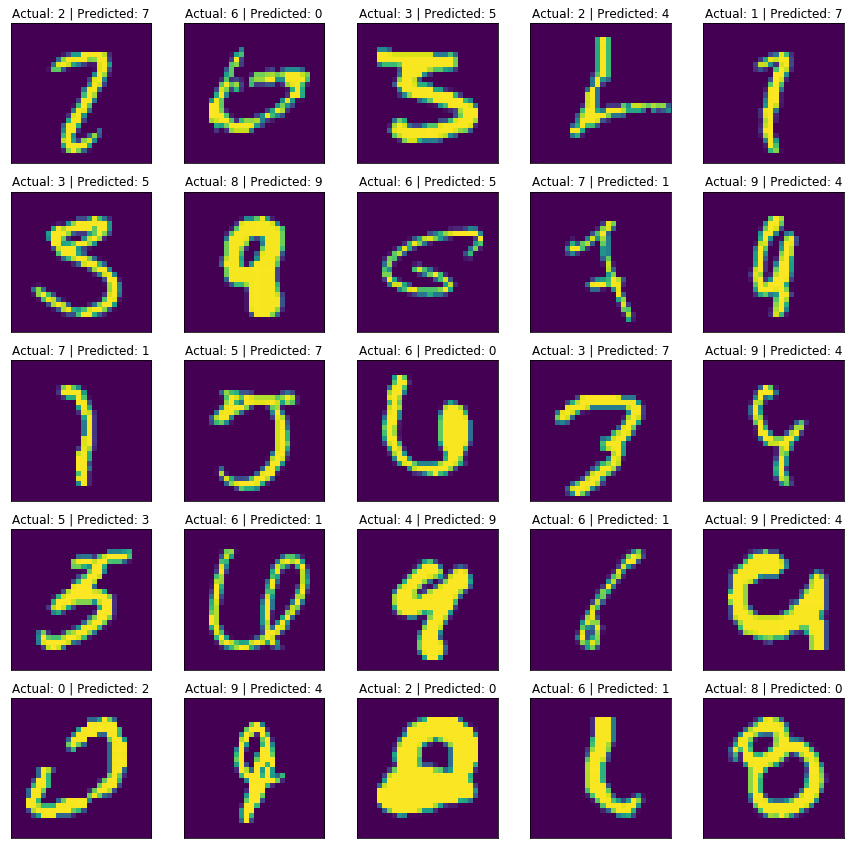

In [22]:
# Plotting wrongly classified images
fig = plt.figure(figsize=(15,15))
for i in range(25):
  ax = fig.add_subplot(5, 5, i + 1, xticks = [], yticks = [])
  im = wrong_x[i]
#   ax.set_title('Actual: %s | Predicted: %s' % (wrong_y[i], wrong_p[i]), color = "white")
  ax.set_title('Actual: %s | Predicted: %s' % (wrong_y[i], wrong_p[i]), color = "black")
  plt.imshow(im)
plt.show()